# CEWA 565 - Homework 1

### Daniel Hogan

### 10/12/2021


#### **Part A.**
*Plot the data from the Sauk River and Skykomish River as a time series from 1929-2020. Use different color lines or symbols to distinguish the two rivers. Be sure to label your axes appropriately and use plt.legend() to create a legend. Describe qualitatively any changes you see in these records through time. Is there a common theme between the two sites?*

In [1]:
# import packages to be used
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [2]:
# change working directory
path = '/home/jovyan/Week-1/HW-1/'
os.chdir(path)
# save each river peak flow file 
sauk_peaks = pd.read_excel('Sauk_peak_WY1929_2017.xlsx',skiprows=6).iloc[1:]
## useful for later reference pd.read_excel("file_name", comment='#').index_col
skykomish_peaks = pd.read_excel('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# get column names for each
print('Sauk peaks columns are: {}'.format(', '.join([*sauk_peaks.columns])))
print('Skykomish peaks columns are: {}'.format(', '.join([*skykomish_peaks.columns])))
# find final WY to ensure it is 2020
print('Final water year is ' + str(skykomish_peaks.iloc[-1]['water year']))

Sauk peaks columns are: water_year, peak_dt, peak_va, gage_ht
Skykomish peaks columns are: date of peak, water year, peak value (cfs), gage_ht (feet)
Final water year is 2020


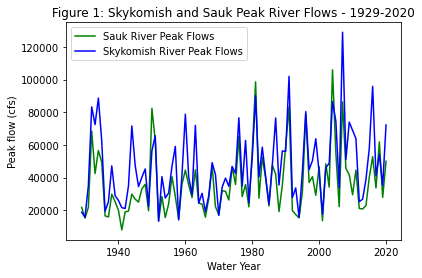

In [4]:
# create plot of Sauk and Skykomish river peak flows from 1929-2020
plt.plot(sauk_peaks['water_year'],sauk_peaks['peak_va'],'-', color = 'green', label='Sauk River Peak Flows')
plt.plot(skykomish_peaks['water year'],skykomish_peaks['peak value (cfs)'],'-', color = 'blue', label='Skykomish River Peak Flows')
# Plot specifications
plt.title('Figure 1: Skykomish and Sauk Peak River Flows - 1929-2020')
plt.xlabel('Water Year')
plt.ylabel('Peak flow (cfs)')
plt.legend()

**Explanation:** 

The plot of these data are relatively similar: low and high relative peak flows for one river generally match the other. From this data, it appears the maximum peak flows have generally been increasing from 1929 to 2020; however, the variance from year to year between peak flows appears to also be increasing (e.g. a high relative peak flow one year can coincide with a low relative peak flow the following year)

#### **Part B.**

We know that in water year 1977, there was a large PDO shift in the North Pacific, and we want to know if floods were statistically different before and after this date. In this homework, we will graphically examine the data.

**For the Sauk River only**, create and examine the following plots for three time periods: the entire timeseries, all data before 1977, all data from 1977 and later.

(Make sure that the following plots are well-labeled, readable, and convey meaningful information)

1. Histograms for the Sauk River for the entire period and the two sub-periods (3 histograms total)
2. Quantile plots using the Cunnane plotting position (see section 2.1.3 in Helsel et al., 2020) for the Sauk River for the entire period and the two sub-periods. Plot all three lines on the same figure, with different line types/colors and a legend.
3. Probability Density Functions (PDFs) for the Sauk River for the entire period and the two sub-periods. The 3 plots should be plotted on one graph, with different line types and a legend.
4. Estimate the sample mean and standard deviation for each of the two sub-periods (before and after 1977). Assuming a Gaussian (normal) distribution, add theoretical quantile curves to the quantile plots you made earlier. (Theoretical meaning that you're plotting Gaussian Cumulative Density Functions (CDFs) that have the same mean and standard deviation that you calculate). (The plot should now have 6 lines on it – please choose colors and line types to help distinguis them, and label carefully.)
5. Box and whisker plots for each of for the entire period and the two sub-periods, with appropriate labels.

In [5]:
# genarate pre and post 1977 Sauk River datasets
sauk_peaks_pre_1977 = sauk_peaks[sauk_peaks['water_year']<1977]
sauk_peaks_post_1977 = sauk_peaks[sauk_peaks['water_year']>=1977]

In [6]:
# store each dataframe in dictionary for later reference
sauk_river_peaks = {'1929-2020':sauk_peaks, 
                    '1929-1976':sauk_peaks_pre_1977,
                    '1977-2020':sauk_peaks_post_1977}

<ipython-input-7-0d89e86bf70c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticks(), rotation = 45)


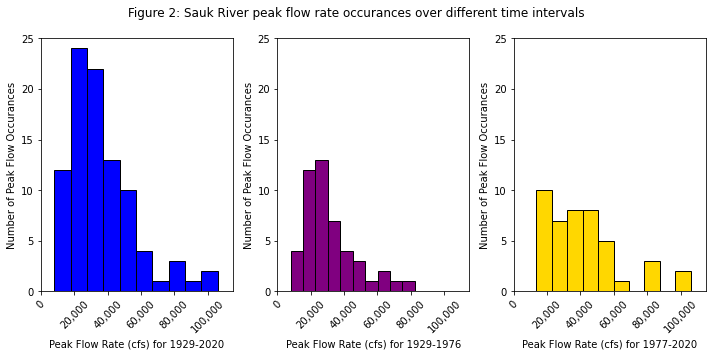

In [7]:
# B.1. Plot histograms
# set up subplots
fig, axs = plt.subplots(1,3, figsize=(10,5), tight_layout=True)
fig.suptitle('Figure 2: Sauk River peak flow rate occurances over different time intervals')
colour = ['b','purple','gold']
# specify number of bins for histogram
nbins = 10
# for loop used to plot histograms for each time series of Sauk River peak data
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    axs[i].hist(df['peak_va'], nbins, fc=colour[i], ec='black')
    # Plot specifications
    axs[i].set_xlabel('Peak Flow Rate (cfs) for {}'.format(dates))
    axs[i].set_ylabel('Number of Peak Flow Occurances')
    axs[i].set_ylim(0,25)
    axs[i].set_xlim(0,115000)
    axs[i].set_xticklabels(axs[i].get_xticks(), rotation = 45)
    axs[i].get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1

In [8]:
# This function requires that the input is a pandas dataframe, with column names, and an integer index
# It returns a copy of the dataframe with an extra column added that has the Cunnane plotting positions
# Reference 2
def cunnane_quantile(df, column_name):
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

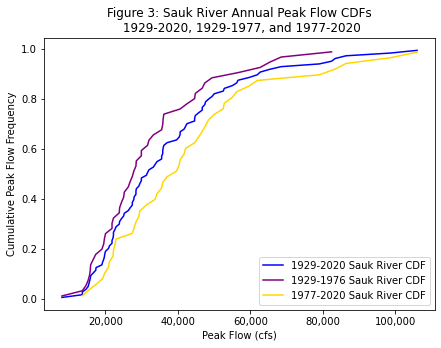

In [9]:
# B.2. Plot CDFs
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
colour = ['b','purple','gold']
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    sauk_quant = cunnane_quantile(df,'peak_va') # calculate quantiles and add to df
    ax1.plot(sauk_quant['peak_va'],
             sauk_quant['cunnane_plotting_position'],
             c=colour[i],
             label='{} Sauk River CDF'.format(dates))
# Plot specifications
ax1.set_xlabel('Peak Flow (cfs)')
ax1.set_ylabel('Cumulative Peak Flow Frequency')
ax1.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1
ax1.set_title('Figure 3: Sauk River Annual Peak Flow CDFs\n 1929-2020, 1929-1977, and 1977-2020')
ax1.legend()
fig.savefig(os.path.join(path,'cdf_plot.png'))

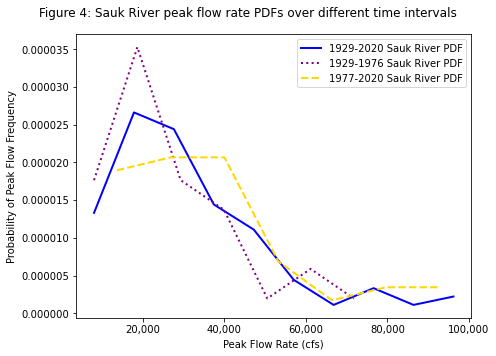

In [10]:
# B.3. Plot PDFs
# set up subplots
fig, ax2 = plt.subplots(1,1, figsize=(7,5), tight_layout=True)
fig.suptitle('Figure 4: Sauk River peak flow rate PDFs over different time intervals')
colour = ['b','purple','gold']
style = ['solid','dotted','dashed']
# for loop used to plot histograms for each time series of Sauk River peak data
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    # Compute a histogram, specifying density=True to get normalized values (integral=1)
    # Reference 3
    counts, bin_edges = np.histogram(df['peak_va'], bins='sqrt', density=True)# using density=True to normalize, and the square root method to determine number of bins
    ax2.plot(bin_edges[:-1], 
             counts,
             color=colour[i],
             ls=style[i],
             lw=2,
             label='{} Sauk River PDF'.format(dates))
# Plot specifications
ax2.ticklabel_format(style='plain')
ax2.set_xlabel('Peak Flow Rate (cfs)')
ax2.set_ylabel('Probability of Peak Flow Frequency')
ax2.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # Reference 2
ax2.legend()
fig.savefig(os.path.join(path,'pdf_plot.png'))

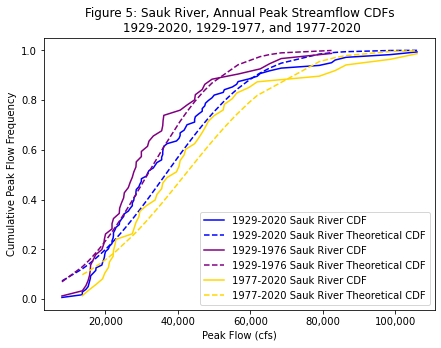

In [11]:
# B.4. Plot CDFs and theoretical CDFs
fig, ax3 = plt.subplots(1, 1, figsize=(7, 5))
colour = ['b','purple','gold']
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    sauk_quant = cunnane_quantile(df,'peak_va')
    # Create theoretical normal CDF based on our sample values before 1975 
    # needed to add astype float because default is object
    # Reference 3
    theoretical_cdf = stats.norm.cdf(sauk_quant['peak_va'].values.astype('float64'),
                                 sauk_quant['peak_va'].mean(),
                                 sauk_quant['peak_va'].std(ddof=1))
    # plot CDFs
    ax3.plot(sauk_quant['peak_va'], sauk_quant['cunnane_plotting_position'], 
             c = colour[i],
            label='{} Sauk River CDF'.format(dates))
    # plot theoretical CDFs with dashed line
    ax3.plot(sauk_quant['peak_va'],theoretical_cdf, 
             c = colour[i],
            linestyle = '--', 
            label='{} Sauk River Theoretical CDF'.format(dates))
# Plot specifications    
ax3.set_xlabel('Peak Flow (cfs)')
ax3.set_ylabel('Cumulative Peak Flow Frequency')
ax3.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 2
ax3.set_title('Figure 5: Sauk River, Annual Peak Streamflow CDFs\n 1929-2020, 1929-1977, and 1977-2020')
ax3.legend()


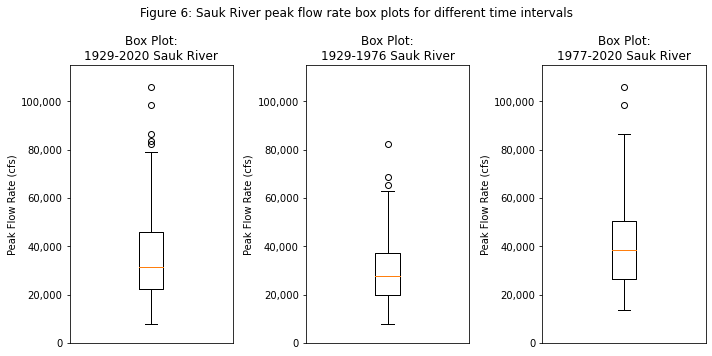

In [12]:
# B.5. Plot box plots
# set up subplots
fig, axs = plt.subplots(1,3, figsize=(10,5), tight_layout=True)
fig.suptitle('Figure 6: Sauk River peak flow rate box plots for different time intervals')
colour = ['b','purple','gold']
# specify number of bins for histogram
nbins = 10
# for loop used to plot histograms for each time series of Sauk River peak data
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    axs[i].boxplot(df['peak_va'])
    # plot specifications
    axs[i].set_title('Box Plot:\n{} Sauk River'.format(dates))
    axs[i].set_ylabel('Peak Flow Rate (cfs)')
    axs[i].set_ylim(0,115000) # make equal to allow for easier comparison
    axs[i].get_xaxis().set_visible(False) # hide the x-axis
    axs[i].set_xticklabels(axs[i].get_xticks(), rotation = 45) # reference 1
    axs[i].get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 2
fig.savefig(os.path.join(path,'box_plot.png'))

### **Part C.** 
Based on all the plots you have now created, write few sentences in a markdown cell discussing whether or not you think a change has occurred in the peak flows around 1977. Be sure to reference your plots (Fig. 1, Fig. 2, etc.) when you discuss them.

### **Response:**
The plots shown above indicate there has been a change in peak flows around 1977. The post-1977 histogram in Figure 2 shows a marked increase in the occurance of high peak flows when compared to both the pre-1977 Sauk River flows subset and the entirety of the Sauk River peak flow dataset. This change is not only visible in the shape of the post-1977 data, but also supported by Figures 3, 4, and 6. Figure 3 shows how the post-1977 values (gold) have influenced the overall Sauk River dataset (blue) by shifting the CDF to where higher peak flow values occur more frequently. The post-1977 CDF is below and the pre-1977 CDF is above the overall peak flows CDF indicating before 1977 the peak flows were more frequently lower. Figures 4 and 6 relay a similar message: peak flows after 1977 have shifted higher. Figure 4 PDF and the median value (orange bar) in Figure 6 show pre-1977 peak flow values to most often be near 20,000-30,000 cfs. Conversely, the post-1977 PDF shows an increase in probability for peak flows near 40,000 cfs and a median in Figure 6 also near 40,000 cfs. Additionally, the top whisker and max values in the Figure 6 box-plots for post-1977 are approximately 20,000 cfs higher for each. In summary, these plots support the hypothesis that a change in peak flows within the Sauk River occured around 1977

## References:
This assignment used the following links for code snippets that was applied to the questions asked:

1. https://stackoverflow.com/questions/51734218/formatting-y-axis-matplotlib-with-thousands-separator-and-font-size
2. Lab 2-1
3. empirical-distribution.ipynb supplied from course website